In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

baza_filmów = pd.read_csv('tmdb_movies.csv')
baza_gatunków = pd.read_csv('tmdb_genres.csv')


In [ ]:
# Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.

kawartyl3 = baza_filmów['vote_count'].quantile(0.75)
filtred_baza_filmów = baza_filmów[baza_filmów['vote_count'] > kawartyl3]

lista_10_najlepiej_ocenianych_filmów = filtred_baza_filmów.sort_values(by='vote_average', ascending=False).head(10)
print(lista_10_najlepiej_ocenianych_filmów[['original_title', 'vote_average', 'vote_count']])

                       original_title  vote_average  vote_count
4639                             Cube           6.9        1069
4259  Snow White and the Seven Dwarfs           6.9        1914
4339                           Dr. No           6.9         940
4345                   Blue Valentine           6.9         890
558                The Simpsons Movie           6.9        2264
513                          The Rock           6.9        1456
426                  The Hunger Games           6.9        9455
400                         Divergent           6.9        4663
545                       Unbreakable           6.9        1946
1810        The Passion of the Christ           6.9         864


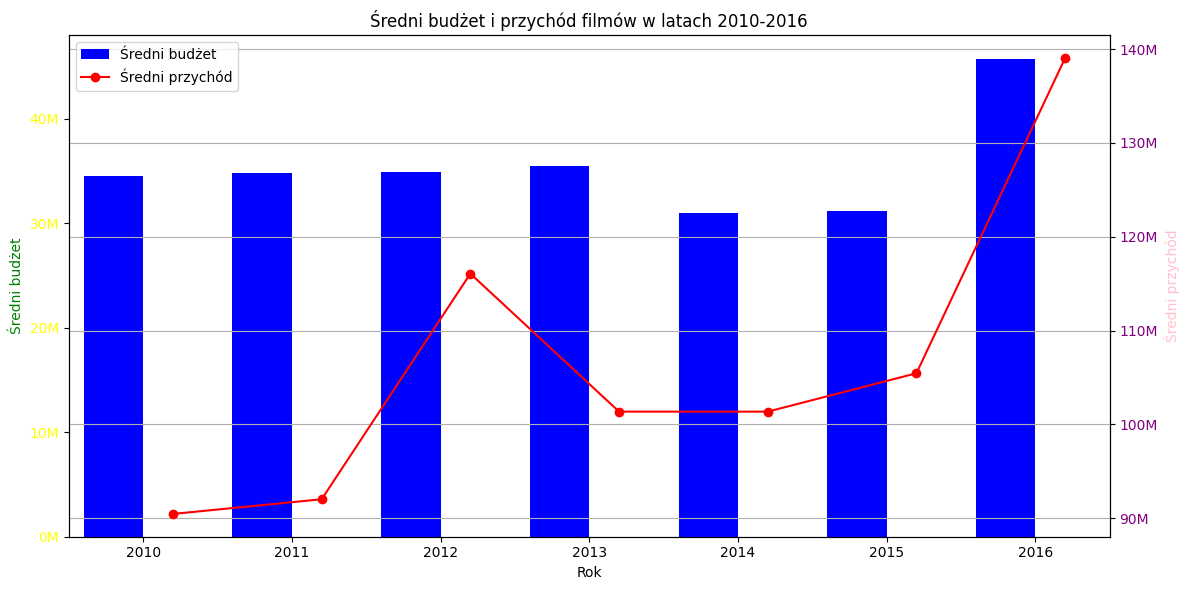

In [ ]:
#Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku dla filmów opublikowanych od 2010 (włącznie) do 2016 roku (włącznie). Następnie na tej podstawie stwórz wykres, w którym średnie przychody są wykresem kolumnowym, a średni budżet wykresem liniowym na tych samych osiach. Sformatuj odpowiednio oś X oraz oś Y. Dodaj tytuł wykresu, oraz legendę, która znajduje się w prawym górnym rogu płótna, lecz poza obszarem osi. Przykład wykresu widoczny poniżej:

# Przygotowanie danych do wykresu
df['release_date'] = pd.to_datetime(df['release_date'], 
errors='coerce')

# Filtrowanie danych do lat 2010-2016
df_filtred = df[(df['release_date'].dt.year >= 2010) & (df['release_date'].dt.year <= 2016)]

# Grupowanie danych według roku i obliczanie średnich wartości
grouped_data = df_filtred.groupby(df_filtred['release_date'].dt.year).agg({'revenue': 'mean', 'budget': 'mean'})
grouped_data = grouped_data.rename(columns={'revenue': 'Średni przychód', 'budget': 'Średni budżet'})

# Tworzenie wykresu
fig, ax1 = plt.subplots(figsize=(12, 6))

# Wykres słupkowy dla średniego budżetu
bar_width = 0.4
ax1.bar(grouped_data.index - bar_width / 2, grouped_data['Średni budżet'], width=bar_width, label='Średni budżet', color='blue')
ax1.set_xlabel('Rok')
ax1.set_ylabel('Średni budżet', color='green')
ax1.tick_params(axis='y', labelcolor='yellow')

# Drugi wykres (lininiarny) dla średniego budżetu
ax2 = ax1.twinx()
ax2.plot(grouped_data.index + bar_width / 2, grouped_data['Średni przychód'], color='red', marker='o', label='Średni przychód')
ax2.set_ylabel('Średni przychód', color='pink')
ax2.tick_params(axis='y', labelcolor='purple')

# Ustawienia osi x
ax1.set_xticks(grouped_data.index)
ax1.set_xlim(2009.5, 2016.5)

# Ustawienia osi y
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M'))
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M'))

# Dodanie legendy i tytułu
plt.title('Średni budżet i przychód filmów w latach 2010-2016')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Wyswietlenie wykresu
plt.tight_layout()
plt.grid()
plt.show()


In [ ]:
#Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z bazą gatunków, tak aby w bazie filmów można było odczytać nazwę gatunku filmu.

# Łączenie baz danych na podstawie 'genre_id'
# Upewnij się, że kolumny 'genre_id' są w tym samym formacie
merged_data = pd.merge(
	baza_filmów[['original_title', 'genre_id']],
	baza_gatunków.rename(columns={'Unnamed: 0': 'genre_id', 'genres': 'name'}),
    # Określenie sposobu łączenia baz danych
    # 'inner' oznacza, że tylko te wiersze, które mają pasujące wartości w obu DataFrame zostaną zachowane
	how='inner',
    # Określenie kolumn do połączenia z lewego i prawego DataFrame, po których następuje łączenie
	left_on='genre_id',
	right_on='genre_id'
)

# Wyświetlenie wyników
print(merged_data[['original_title', 'genre_id', 'name']])


                                original_title  genre_id         name
0                                       Avatar      28.0       Action
1     Pirates of the Caribbean: At World's End      12.0    Adventure
2                                      Spectre      28.0       Action
3                        The Dark Knight Rises      28.0       Action
4                                  John Carter      28.0       Action
...                                        ...       ...          ...
4798                               El Mariachi      28.0       Action
4799                                 Newlyweds      35.0       Comedy
4800                 Signed, Sealed, Delivered      35.0       Comedy
4801                          Shanghai Calling       NaN          NaN
4802                         My Date with Drew      99.0  Documentary

[4803 rows x 3 columns]


In [ ]:
#Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?

# Zliczanie liczby wystąpień każdego gatunku
gatunki_count = merged_data['name'].value_counts()

# Najczęściej występujący gatunek
najczestszy_gatunek = gatunki_count.idxmax()
liczba_filmów = gatunki_count.max()
print(f'Najczęściej występujący gatunek: {najczestszy_gatunek} ({liczba_filmów} filmów)')


Najczęściej występujący gatunek: Drama (1207 filmów)


In [ ]:
#Filmy, którego gatunku trwają średnio najdłużej (runtime)?

# Łączenie baz danych na podstawie 'genre_id' i dodanie kolumny 'runtime'
merged_data_with_runtime = pd.merge(
	baza_filmów[['original_title', 'genre_id', 'runtime']],
	baza_gatunków.rename(columns={'Unnamed: 0': 'genre_id', 'genres': 'name'}),
	how='inner',
	left_on='genre_id',
	right_on='genre_id'
)

# Obliczanie średniego czasu trwania filmów dla każdego gatunku
# .mean() oblicza średnią wartość dla każdej grupy
# .groupby() grupuje dane według kolumny 'name' (gatunek)
gatunki_time = merged_data_with_runtime['runtime'].groupby(merged_data_with_runtime['name']).mean()
# Sortowanie wyników malejąco i wybieranie 10 najdłuższych gatunków
# .sort_values(ascending=False) sortuje dane malejąco
gatunki_time = gatunki_time.sort_values(ascending=False).head(10)
# Wyświetlanie wyników .idxmax() zwraca indeks (gatunek) o największej wartości, a .max() zwraca tę wartość
print(gatunki_time.idxmax(), gatunki_time.max())

History 133.96


                                       original_title  runtime
110                                      Pearl Harbor    183.0
280                                    Public Enemies    140.0
633                                           Lincoln    149.0
839                                             Evita    134.0
1091                                            Nixon    192.0
1349                            Ghosts of Mississippi    130.0
1677                                   Goodbye Bafana    140.0
1877                                Tora! Tora! Tora!    144.0
1954                                         Waterloo    128.0
2008                            In the Valley of Elah    124.0
2115                                            Selma    127.0
2141                                             Milk    128.0
2370                                           Монгол    120.0
2522                               The Imitation Game    113.0
2680                                    The Iron Lady  

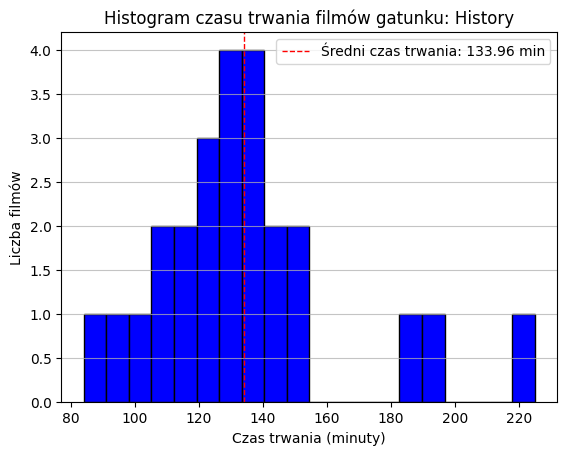

In [64]:
# Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem trwania

# Filtrowanie danych dla najdłuższego gatunku
najdluzszy_gatunek = gatunki_time.idxmax()
filtred_data = merged_data_with_runtime[merged_data_with_runtime['name'] == najdluzszy_gatunek]
print(filtred_data[['original_title', 'runtime']])

# Tworzenie histogramu
plt.hist(filtred_data['runtime'], bins=20, color='blue', edgecolor='black')
plt.title(f'Histogram czasu trwania filmów gatunku: {najdluzszy_gatunek}')

# Dodanie etykiet i tytułu
plt.xlabel('Czas trwania (minuty)')
plt.ylabel('Liczba filmów')
plt.title(f'Histogram czasu trwania filmów gatunku: {najdluzszy_gatunek}')
plt.grid(axis='y', alpha=0.75)

# Dodanie linii pionowej dla średniego czasu trwania
avg_runtime = filtred_data['runtime'].mean()
plt.axvline(avg_runtime, color='red', linestyle='dashed', linewidth=1, label=f'Średni czas trwania: {avg_runtime:.2f} min')
plt.legend()

plt.show()
